# 3.1

## 1

In [2]:
import scipy.io as scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def gaussian(x):
    mean = np.sum(x)/len(x)
    x_cent = x - mean
    var = np.matmul(np.transpose(x_cent), x_cent) / len(x)
    sd = np.sqrt(var)
    return mean, sd


## 2

In [81]:
mat = scipy.loadmat('/Users/wyattmadden/Documents/school/' + 
                    'MSU/2020/m508/labs/lab_2/employees.mat')
dept = mat['dept'][0]
sal = mat['sal'][0]
depts = mat['depts']


## 3

In [140]:
mean_sd_by_dept = np.empty((np.max(dept) - 1, 2))

for i in range(1, np.max(dept)):
    mean_sd_by_dept[i - 1,] = gaussian(sal[dept == i])
    print("Department " + str(i) +  " has mean salary $" + 
          str(np.round(mean_sd_by_dept[i - 1, 0], 2)) + 
          " with standard deviation " + 
          str(np.round(mean_sd_by_dept[i - 1, 1], 2)) + ".")
    



Department 1 has mean salary $82287.46 with standard deviation 15880.04.
Department 2 has mean salary $76925.82 with standard deviation 20624.72.
Department 3 has mean salary $80859.86 with standard deviation 19905.39.
Department 4 has mean salary $56850.31 with standard deviation 29301.85.
Department 5 has mean salary $70260.79 with standard deviation 11694.93.
Department 6 has mean salary $70665.27 with standard deviation 20390.71.
Department 7 has mean salary $88247.96 with standard deviation 17844.79.
Department 8 has mean salary $38635.3 with standard deviation 35090.32.
Department 9 has mean salary $82412.05 with standard deviation 21556.95.
Department 10 has mean salary $72114.07 with standard deviation 20541.12.
Department 11 has mean salary $53791.29 with standard deviation 28718.84.
Department 12 has mean salary $79869.23 with standard deviation 15285.17.
Department 13 has mean salary $77601.17 with standard deviation 21205.31.
Department 14 has mean salary $86765.19 with sta

## 4

In [141]:
print("Department " + str(np.argmax(mean_sd_by_dept, axis = 0)[0] + 1) + 
      " has the maximum mean salary of $" + 
      str(np.round(np.max(mean_sd_by_dept, axis = 0)[0], 2)))

print("Department " + str(np.argmin(mean_sd_by_dept, axis = 0)[0] + 1) + 
      " has the minimum mean salary of $" + 
      str(np.round(np.min(mean_sd_by_dept, axis = 0)[0], 2)))


Department 29 has the maximum mean salary of $94083.53
Department 8 has the minimum mean salary of $38635.3


## 5

In [146]:
print("Department " + str(np.argmax(mean_sd_by_dept, axis = 0)[1] + 1) + 
      " has the maximum variance of " + 
      str(np.round(np.max(mean_sd_by_dept, axis = 0)[1]**2, 2)))

print("Department " + str(np.argmin(mean_sd_by_dept, axis = 0)[1] + 1) + 
      " has the minimum variance of " + 
      str(np.round(np.min(mean_sd_by_dept, axis = 0)[1]**2, 2)))


Department 14 has the maximum variance of 1841837960.84
Department 5 has the minimum variance of 136771290.8


Hard to say if there is yet a "pattern", however it's interesting that the minimum variance and minimum mean are both from a departmenet labeled with a smaller integer, while the maximum variance and maximum mean are both from a department labeled with a larger integer. 

## 6

First let us define a gaussian density function, and then calculate the density at 10,000 for each of the department specific parameter combinations. 

In [185]:
def gaussian_density(x, mean, sd):
    return (1/(sd*np.sqrt(2*np.pi)))*np.exp( -(1/2)*((x - mean)/sd)**2)

point_densities = np.empty(np.max(dept) - 1)
means = [param[0] for param in mean_sd_by_dept]
sds = [param[1] for param in mean_sd_by_dept]

for i in range(0, len(point_densities)):
    point_densities[i] = gaussian_density(10000, means[i], sds[i])

print("Department " + str(np.argmin(point_densities) + 1) +
      " is least likely to pay someone $10000 per year.")

print("Department " + str(np.argmax(point_densities) + 1) +
      " is most likely to pay someone $10000 per year.")


Department 5 is least likely to pay someone $10000 per year.
Department 8 is most likely to pay someone $10000 per year.


# 3.2
## 1

In [29]:
# Create Lat-Long Grid
#   from lat long coordinates, create grid of points
# Input:
#   lat: 1D vector of lat coords
#   lon: 1D vector of long coords
#   dims: length/width of grid
# Output:
#   C: 2D array of lat long grid coords

def lat_lon_grid(lat, lon, dims):
    lat_max = np.max(lat)
    lat_min = np.min(lat)
    lon_max = np.max(lon)
    lon_min = np.min(lon)
    lat_seq = np.linspace(lat_min, lat_max, dims)
    lon_seq = np.linspace(lon_min, lon_max, dims)
    lat_grid, lon_grid = np.meshgrid(lat_seq, lon_seq)
    lat_vect = lat_grid.flatten()
    lon_vect = lon_grid.flatten()
    return np.c_[lat_vect, lon_vect]



In [176]:
# def kde(X, h, C):

# Kernel Density Estimation
#   Samples the kernel density estimate of a probability distribution using the
#  data in X with Gaussian kernel of standard deviation h. Samples are calculated
#  for each location in C.
# Input:
#   X - A D-by-N matrix with observation locations in each column (thus the
#   	observations are in D-dimensions and there are N of them).
#   h - A number indicating the standard deviation of the Gaussian kernel used.
#   C - Locations to evaluate the estimated distribution. Hence D-by-M, where if 
#      M = 1 this function calculates the KDE at one location.
# Output:
#   E - Evaluation of the estimated distribution at each of M locations given by 
#      the input C. Should be returned as a column vector.

# def kde(X, h, C):

def kde(X, h, C):
    kde_mass_vector = np.empty(C.shape[0])
    
    for i in range(0, C.shape[0]):
        data_to_gridpoint_distances = np.diagonal(np.matmul(X - C[i], 
                                                            np.transpose(X - C[i])))
        gaus_kern = 1/np.exp(data_to_gridpoint_distances / (2*(h**2)))
        point_masses = gaus_kern / (2*np.pi*h**2)**(X.shape[1]/2)
        kde_mass_vector[i] = np.sum(point_masses) / X.shape[0]
    
    return kde_mass_vector

# 2

In [177]:
mat_crimes = scipy.loadmat('/Users/wyattmadden/Documents/school/' + 
                           'MSU/2020/m508/labs/lab_2/crimes.mat',
                           squeeze_me = True)
type_crime = mat_crimes['type']
year = mat_crimes['year']
lat = mat_crimes['lat']
lon = mat_crimes['lon']

## 3

In [209]:
lat_15_2014 = lat[(type_crime == 15) & (year == 2014)]
lon_15_2014 = lon[(type_crime == 15) & (year == 2014)]

coord_grid = lat_lon_grid(lat_15_2014, lon_15_2014, dims = 100)

mass_temp = kde(X = np.c_[lat_15_2014, lon_15_2014],
                h = 0.01, 
                C = coord_grid)



Text(0.5,1,'2014, Crime Type 15')

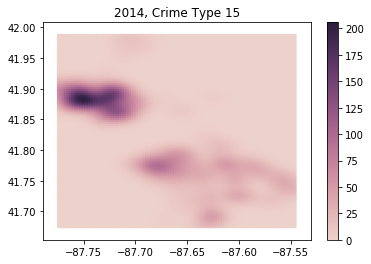

In [210]:
#plot
lat_grid = [param[0] for param in coord_grid]
lon_grid = [param[1] for param in coord_grid]

cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(lon_grid, lat_grid, c = mass_temp, s = 5, cmap=cmap)
f.colorbar(points)
ax.set_title("2014, Crime Type 15")


## 4

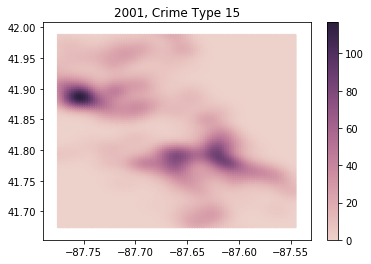

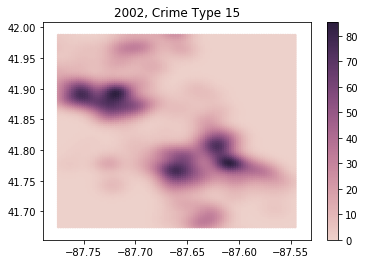

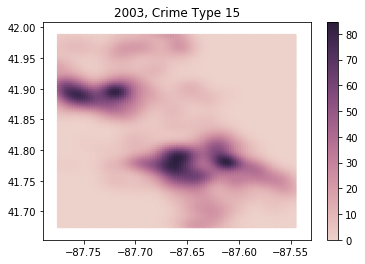

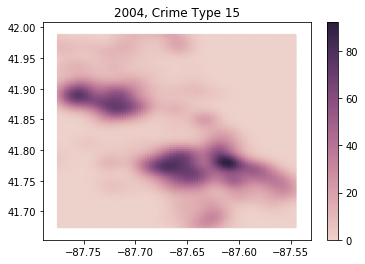

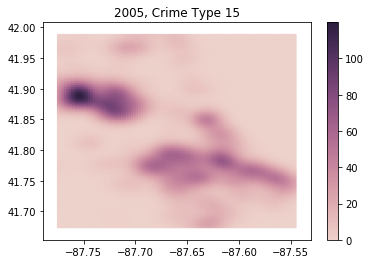

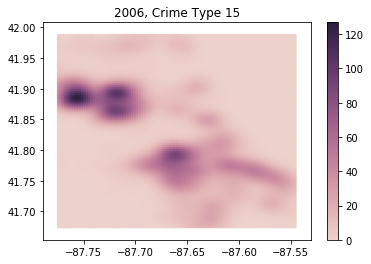

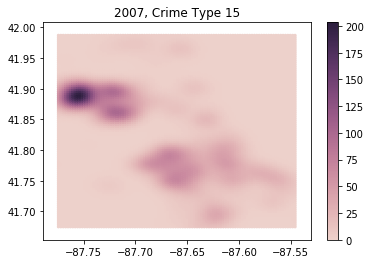

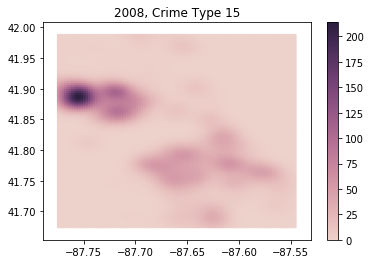

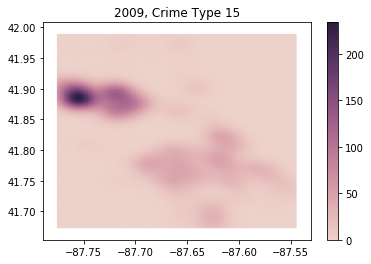

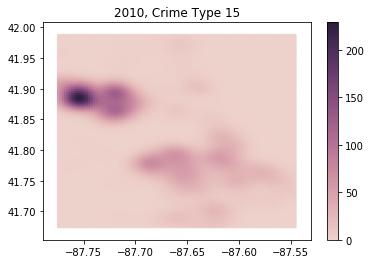

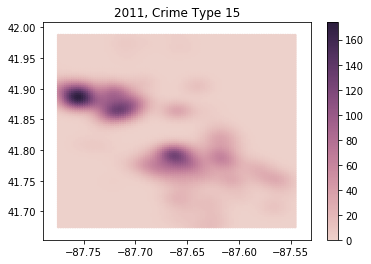

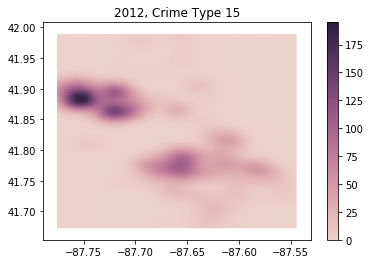

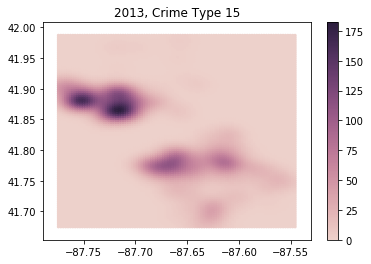

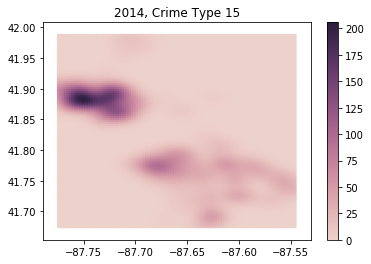

In [193]:
for i in range(2001, 2015):
    lat_15_general = lat[(type_crime == 15) & (year == i)]
    lon_15_general = lon[(type_crime == 15) & (year == i)]
    
    coord_grid = lat_lon_grid(lat_15_2014, lon_15_2014, dims = 75)
    
    mass_temp = kde(X = np.c_[lat_15_general, lon_15_general],
                    h = 0.01, 
                    C = coord_grid)
    #plot
    lat_grid = [param[0] for param in coord_grid]
    lon_grid = [param[1] for param in coord_grid]

    cmap = sns.cubehelix_palette(as_cmap=True)
    f, ax = plt.subplots()
    points = ax.scatter(lon_grid, lat_grid, c=mass_temp, s=10, cmap=cmap)
    f.colorbar(points)
    ax.set_title(str(i) + ", Crime Type 15")

    

## 5 

While the distribution of Chicagoan gambling crimes is relatively constant across years, and least in terms of boundaries, there does appear to be a shift in intensity of gambling crimes in the northwestern neighborhoods when compared to the southeastern neighborhoods. Specifically, in early years the intensity of gambling crimes between these two areas appears similar, while in later years the intensity in the southeastern neighborhoods appears diminished in comparison to the northwestern neighborhoods. 

It also appears that overall, gambling crimes are going up across years, at least when comparing the highest intensity neighborhoods within each year. 


## 6

Text(0.5,1,'2014, Crime Type 15')

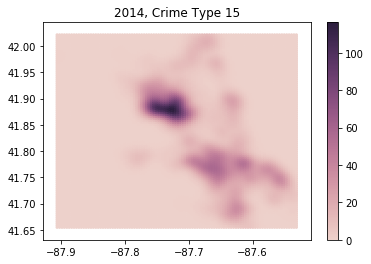

In [211]:

lat_1_2014 = lat[(type_crime == 1) & (year == 2014)]
lon_1_2014 = lon[(type_crime == 1) & (year == 2014)]

coord_grid = lat_lon_grid(lat_1_2014, lon_1_2014, dims = 100)

mass_temp = kde(X = np.c_[lat_1_2014, lon_1_2014],
                h = 0.01, 
                C = coord_grid)


#plot
lat_grid = [param[0] for param in coord_grid]
lon_grid = [param[1] for param in coord_grid]

cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(lon_grid, lat_grid, c = mass_temp, s = 5, cmap=cmap)
f.colorbar(points)
ax.set_title("2014, Crime Type 1")


# 4

## 1

This means that the model could likely be improved to better match the context. We would likely want to alter the density kernal. An alternative "smooth" kernal could be a truncated normal, with the zero probability density on values less than zero. 

## 2

The kernal density estimation does not account for natural borders, such as coastlines, and thus predicts positive probability of crime in Lake Michigan. While the probability of lake-crime may be non-zero, we would likely want to account for "lake" effect on crime (ie. the fact that a crime is much less likely to occur in a lake), possibly by including a dummy variable predictor indicating whether the location is in a lake or not. 






An alternative way to generate the charts in python is presented below. 
We took a look at manipulating H and thought about bias/variance tradeoff a little bit for predictions. 
Wish there was a more sensible way to hone in on an 'optimal' value of H, more to learn in the future! 

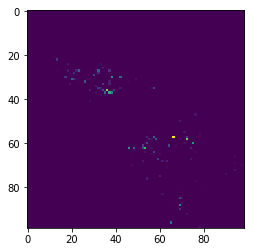

In [5]:
#3.2 Kernal density estimation 
#define KDE function
def KDE(lat_a, lon_a, lat, lon, h):
    #for a single location 
    #euclidean distance of point 1 with all other points
    N = lat.shape[0]
    E = np.zeros(shape=(N))
    #lat_a = lat[i]
    #lat_b = lon[i]
    distance = np.sqrt((lat_a - lat)**2 + (lon_a-lon)**2)
    E = (1/N)*((2* np.pi * h**2) *np.exp(-(1/2*(h**2))*distance).sum(0))
    return E
crime = scipy.loadmat('/Users/wyattmadden/Documents/school/' + 
                           'MSU/2020/m508/labs/lab_2/crimes.mat')
import matplotlib.pyplot as plt
lat = crime['lat'][0]
lon = crime['lon'][0]
year = crime['year'][0]
type = crime['type'][0]
h = 1
#test function
KDE(lat_a = lat[2], lon_a = lon[2], lat = lat, lon = lon, h =1)
#great, works
def KDE_map(points, lat, lon, h):
#points
    density = np.zeros(shape=(points,points))
    lat_unif = np.linspace(max(lat), min(lat), points) #go from largest to smallest, we want the larger values coming at the top of the graph
    lon_unif = np.linspace(min(lon), max(lon), points) #go from smallest to largest, we want the larger, less negative values, coming later
    for j in range(1,points):
        #print(j)
        lat_index = lat_unif[j]
        for i in range(1,points):
            #index density by lat first, then lon
            #python goes matrix[columns, rows], and we want our columns to be latitudes
            density[j,i] = KDE(lat_a = lat_index, lon_a = lon_unif[i], lat = lat, lon = lon, h = h)
    return(density)
    
#create data
lat = lat[type == 15]
lon = lon[type == 15]
year = year[type == 15]
points = 100

#which bear h is besttttttttttt 
density = KDE_map(points, lat[year == 2013], lon[year == 2013], h = 1)
plt.imshow(density[1:points, 1:points])


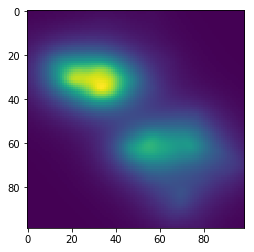

In [6]:
density = KDE_map(points, lat[year == 2013], lon[year == 2013], h = 10)
plt.imshow(density[1:points, 1:points])


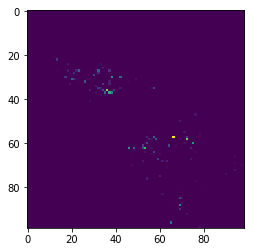

In [7]:
density = KDE_map(points, lat[year == 2013], lon[year == 2013], h = 100)
plt.imshow(density[1:points, 1:points])